<a href="https://colab.research.google.com/github/CharlesPoletowin/YCBS-273/blob/master/Exercise20190809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### the package I should import

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### initial dealing with data

In [0]:

data_train=pd.read_csv("/content/sample_data/california_housing_train.csv")
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
data_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
data_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [0]:
X=data_train.drop("median_house_value",axis=1)
Y=data_train.median_house_value

In [0]:
TX=data_test.drop("median_house_value",axis=1)
TY=data_test.median_house_value

In [0]:
# X=torch.FloatTensor(X.values)
X,Y,TX,TY=map(torch.FloatTensor,(X.values,Y.values,TX.values,TY.values))

In [0]:
X=X.cuda()
Y=Y.cuda()
TX=TX.cuda()
TY=TY.cuda()

In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
longitude             3000 non-null float64
latitude              3000 non-null float64
housing_median_age    3000 non-null float64
total_rooms           3000 non-null float64
total_bedrooms        3000 non-null float64
population            3000 non-null float64
households            3000 non-null float64
median_income         3000 non-null float64
median_house_value    3000 non-null float64
dtypes: float64(9)
memory usage: 211.0 KB


### initial model housing predict 

In [0]:
class housing_predict(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights_1 = nn.Parameter(torch.randn(8, 8))
    self.bias_1 = nn.Parameter(torch.zeros(8))
    
    self.weights_2 = nn.Parameter(torch.randn(8, 8))
    self.bias_2 = nn.Parameter(torch.zeros(8))
    
    self.weights_3 = nn.Parameter(torch.randn(8, 8))
    self.bias_3 = nn.Parameter(torch.zeros(8))

    self.weights_4 = nn.Parameter(torch.randn(8, 8))
    self.bias_4 = nn.Parameter(torch.zeros(8))

    self.weights_5 = nn.Parameter(torch.randn(8, 8))
    self.bias_5 = nn.Parameter(torch.zeros(8))

    self.weights_6 = nn.Parameter(torch.randn(8, 8))
    self.bias_6 = nn.Parameter(torch.zeros(8))

    self.weights_7 = nn.Parameter(torch.randn(8, 8))
    self.bias_7 = nn.Parameter(torch.zeros(8))

    self.weights_8 = nn.Parameter(torch.randn(8, 1))
    self.bias_8 = nn.Parameter(torch.zeros(1))

  def forward(self, xb):
    h =  xb.matmul(self.weights_1) + self.bias_1
    h = F.relu(h)
    h =  h.matmul(self.weights_2) + self.bias_2
    h = F.tanh(h)
    h =  h.matmul(self.weights_3) + self.bias_3
    h=F.sigmoid(h)
    h =  h.matmul(self.weights_4) + self.bias_4
    h=F.tanh(h)
    h =  h.matmul(self.weights_5) + self.bias_5
    h = F.relu(h)
    h =  h.matmul(self.weights_6) + self.bias_6
    h=F.sigmoid(h)
    h =  h.matmul(self.weights_7) + self.bias_7
    h=F.tanh(h)
    h =  h.matmul(self.weights_8) + self.bias_8
    out = h
    return out

In [0]:
# def train_model(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=100, lr=0.01, weight_decay=0):
#   # data
#   train_dataset = TensorDataset(x_train, y_train)
#   train_data_loader = DataLoader(train_dataset, batch_size=batch_size)

#   # loss function
#   loss_func = F.l1_loss

#   # optimizer
#   optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

#   # training loop
#   y_pred = model(x_test)
#   print('Test error of model before training: ', loss_func(y_pred, y_test))

#   train_loss = []
#   test_loss = []
#   for epoch in range(epochs):
#     epoch_loss = 0
    
#     for xb, yb in train_data_loader:
      
#       pred = model(xb)
#       loss = loss_func(pred, yb)

#       loss.backward()
#       optimizer.step()
#       optimizer.zero_grad()
      
#       epoch_loss += loss
    
#     y_pred = model(x_test)
#     test_loss.append(loss_func(y_pred, y_test))
#     train_loss.append(epoch_loss/len(train_data_loader))
    
#     print('Loss at epoch %d : %f' % (epoch, epoch_loss/len(train_data_loader)))

#   # model evaluation
#   y_pred = model(x_test)
#   print('Test error of model after training: ', loss_func(y_pred, y_test))
#   return train_loss, test_loss

In [0]:
model=housing_predict()
model.cuda()
train_loss, test_loss = train_model(model,X,Y,TX,TY,epochs=500, batch_size=512,lr=0.1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the 

Test error of model before training:  tensor(205846.3281, device='cuda:0', grad_fn=<L1LossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 204522.328125
Loss at epoch 1 : 204491.890625
Loss at epoch 2 : 204461.296875
Loss at epoch 3 : 204430.656250
Loss at epoch 4 : 204400.093750
Loss at epoch 5 : 204369.484375
Loss at epoch 6 : 204338.890625
Loss at epoch 7 : 204308.296875
Loss at epoch 8 : 204277.656250
Loss at epoch 9 : 204247.062500
Loss at epoch 10 : 204216.484375
Loss at epoch 11 : 204185.890625
Loss at epoch 12 : 204155.296875
Loss at epoch 13 : 204124.656250
Loss at epoch 14 : 204094.062500
Loss at epoch 15 : 204063.484375
Loss at epoch 16 : 204032.890625
Loss at epoch 17 : 204002.296875
Loss at epoch 18 : 203971.656250
Loss at epoch 19 : 203941.062500
Loss at epoch 20 : 203910.484375
Loss at epoch 21 : 203879.890625
Loss at epoch 22 : 203849.296875
Loss at epoch 23 : 203818.656250
Loss at epoch 24 : 203788.062500
Loss at epoch 25 : 203757.484375
Loss at epoch 26 : 203726.890625
Loss at epoch 27 : 203696.296875
Loss at epoch 28 : 203665.656250
Loss at epoch 29 : 203635.062500
Loss at epoch 30 : 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [0]:
def get_learning_curves(train_loss, test_loss):
  plt.figure()
  plt.plot(train_loss[:])
  plt.plot(test_loss[:])
  plt.legend(['Training loss', 'Validation loss'])

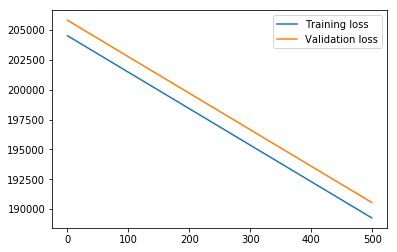

In [0]:
get_learning_curves(train_loss, test_loss)

### find the problem that we get the same results no matter what we input

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


array([[15297.206],
       [15297.206],
       [15297.206],
       ...,
       [15297.206],
       [15297.206],
       [15297.206]], dtype=float32)

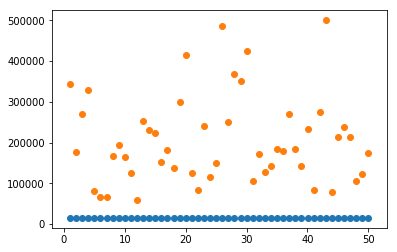

In [0]:
x=np.linspace(1,3001,3000)
plt.scatter(x[:50],model(TX).cpu().detach().numpy()[:50])
plt.scatter(x[:50],TY.cpu().numpy()[:50])
model(TX).cpu().detach().numpy()

### change the model

In [0]:
class housing_predict(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights_1 = nn.Parameter(torch.randn(8, 16))
    self.bias_1 = nn.Parameter(torch.zeros(16))
    
    self.weights_2 = nn.Parameter(torch.randn(16, 8))
    self.bias_2 = nn.Parameter(torch.zeros(8))
    
    self.weights_3 = nn.Parameter(torch.randn(8, 1))
    self.bias_3 = nn.Parameter(torch.zeros(1))

  def forward(self, xb):
    h =  xb.matmul(self.weights_1) + self.bias_1
    h = F.relu(h)
    h =  h.matmul(self.weights_2) + self.bias_2
    h = F.relu(h)
    h =  h.matmul(self.weights_3) + self.bias_3
    out = h
    return out

In [0]:
model=housing_predict()
model.cuda()
train_loss, test_loss = train_model(model,X,Y,TX,TY,epochs=50, batch_size=128,lr=0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(195495.1562, device='cuda:0', grad_fn=<L1LossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 240326.953125
Loss at epoch 1 : 207130.968750
Loss at epoch 2 : 238606.140625
Loss at epoch 3 : 207134.109375
Loss at epoch 4 : 207133.812500
Loss at epoch 5 : 207133.531250
Loss at epoch 6 : 207133.218750
Loss at epoch 7 : 207132.906250
Loss at epoch 8 : 207132.562500
Loss at epoch 9 : 207132.078125
Loss at epoch 10 : 207131.437500
Loss at epoch 11 : 207130.781250
Loss at epoch 12 : 207129.937500
Loss at epoch 13 : 207128.828125
Loss at epoch 14 : 207127.500000
Loss at epoch 15 : 207125.671875
Loss at epoch 16 : 207123.484375
Loss at epoch 17 : 207120.578125
Loss at epoch 18 : 207116.859375
Loss at epoch 19 : 207112.078125
Loss at epoch 20 : 207105.859375
Loss at epoch 21 : 207097.750000
Loss at epoch 22 : 207087.234375
Loss at epoch 23 : 207073.640625
Loss at epoch 24 : 207055.812500
Loss at epoch 25 : 207032.687500
Loss at epoch 26 : 207002.515625
Loss at epoch 27 : 206963.171875
Loss at epoch 28 : 206911.984375
Loss at epoch 29 : 206845.125000
Loss at epoch 30 : 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


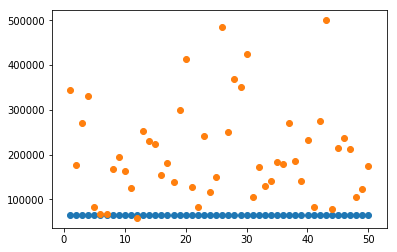

In [0]:
x=np.linspace(1,3000,3000)
plt.scatter(x[:50],model(TX).cpu().detach().numpy()[:50])
plt.scatter(x[:50],TY.cpu().numpy()[:50])

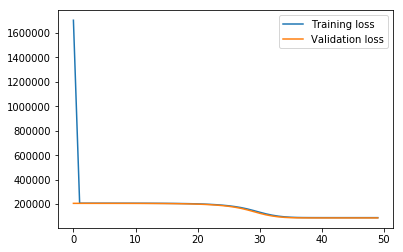

In [0]:
get_learning_curves(train_loss, test_loss)

### simplify the model

In [0]:
class Net(torch.nn.Module):  # 继承 torch 的 Module（固定）
    def __init__(self, n_feature, n_hidden, n_output):    #定义层的信息，n_feature多少个输入, n_hidden每层神经元, n_output多少个输出
        super(Net, self).__init__()     # 继承 __init__ 功能（固定）
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 定义隐藏层，线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 定义输出层线性输出
 
    def forward(self, x):   # x是输入信息就是data，同时也是 Module 中的 forward 功能，定义神经网络前向传递的过程，把__init__中的层信息一个一个的组合起来
        # 正向传播输入值, 神经网络分析出输出值
        x = F.tanh(self.hidden(x))      # 定义激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出层，输出值
        return x
 
net = Net(n_feature=8, n_hidden=64, n_output=1)
 
print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=8, out_features=64, bias=True)
  (predict): Linear(in_features=64, out_features=1, bias=True)
)


In [0]:
model=net
model.cuda()
train_loss, test_loss = train_model(model,X,Y,TX,TY,epochs=100, batch_size=256,lr=0.001)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(588.2588, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 153.635361
Loss at epoch 1 : 132.523148
Loss at epoch 2 : 131.975159
Loss at epoch 3 : 132.205460
Loss at epoch 4 : 132.990311
Loss at epoch 5 : 132.620132
Loss at epoch 6 : 132.728470
Loss at epoch 7 : 132.358978
Loss at epoch 8 : 132.616608
Loss at epoch 9 : 132.365341
Loss at epoch 10 : 132.642899
Loss at epoch 11 : 132.648499
Loss at epoch 12 : 132.561386
Loss at epoch 13 : 131.989700
Loss at epoch 14 : 132.585388
Loss at epoch 15 : 132.564621
Loss at epoch 16 : 132.521149
Loss at epoch 17 : 131.561142
Loss at epoch 18 : 132.508118
Loss at epoch 19 : 132.517258
Loss at epoch 20 : 132.485123
Loss at epoch 21 : 132.344162
Loss at epoch 22 : 132.587585
Loss at epoch 23 : 132.496078
Loss at epoch 24 : 132.520935
Loss at epoch 25 : 132.473389
Loss at epoch 26 : 132.455963
Loss at epoch 27 : 132.430420
Loss at epoch 28 : 132.381729
Loss at epoch 29 : 132.444031
Loss at epoch 30 : 132.440094
Loss at epoch 31 : 132.526337
Loss at epoch 32 : 132.430344
Loss at epoch 33 : 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [0]:
x=np.linspace(0,2999,3000)
x

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.997e+03, 2.998e+03,
       2.999e+03])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


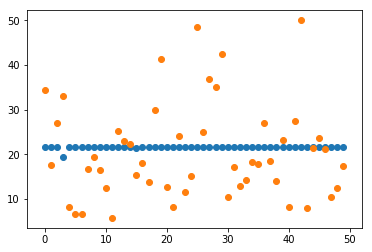

In [0]:
plt.scatter(x[:50],model(TX).cpu().detach().numpy()[:50])
plt.scatter(x[:50],TY.cpu().numpy()[:50])

In [0]:
model(TX)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([[21.7504],
        [21.7504],
        [21.7504],
        ...,
        [21.7504],
        [19.2723],
        [21.7504]], device='cuda:0', grad_fn=<AddmmBackward>)

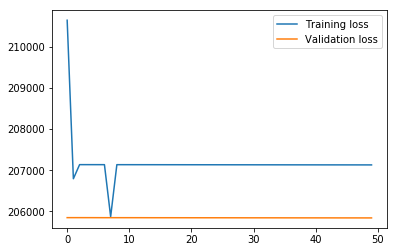

In [0]:
get_learning_curves(train_loss, test_loss)

In [0]:
X

tensor([[-114.3100,   34.1900,   15.0000,  ..., 1015.0000,  472.0000,
            1.4936],
        [-114.4700,   34.4000,   19.0000,  ..., 1129.0000,  463.0000,
            1.8200],
        [-114.5600,   33.6900,   17.0000,  ...,  333.0000,  117.0000,
            1.6509],
        ...,
        [-124.3000,   41.8400,   17.0000,  ..., 1244.0000,  456.0000,
            3.0313],
        [-124.3000,   41.8000,   19.0000,  ..., 1298.0000,  478.0000,
            1.9797],
        [-124.3500,   40.5400,   52.0000,  ...,  806.0000,  270.0000,
            3.0147]], device='cuda:0')

In [0]:
F.nll_loss

<function torch.nn.functional.nll_loss>

In [0]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=100, lr=0.0001, weight_decay=0.0001):
  # data
  train_dataset = TensorDataset(x_train, y_train)
  train_data_loader = DataLoader(train_dataset, batch_size=batch_size)

  # loss function
  loss_func = F.mse_loss

  # optimizer
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

  # training loop
  y_pred = model(x_test)
  print('Test error of model before training: ', loss_func(y_pred, y_test))

  train_loss = []
  test_loss = []
  for epoch in range(epochs):
    epoch_loss = 0
    
    for xb, yb in train_data_loader:
      
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      
      epoch_loss += loss
    
    y_pred = model(x_test)
    test_loss.append(loss_func(y_pred, y_test))
    train_loss.append(epoch_loss/len(train_data_loader))
    
    print('Loss at epoch %d : %f' % (epoch, epoch_loss/len(train_data_loader)))

  # model evaluation
  y_pred = model(x_test)
  print('Test error of model after training: ', loss_func(y_pred, y_test))
  return train_loss, test_loss

In [0]:
model=Net(n_feature=8, n_hidden=64, n_output=1)
model.cuda()
train_loss, test_loss = train_model(model,X,Y,TX,TY,epochs=100, batch_size=512,lr=0.00001)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(581.3372, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 563.587646
Loss at epoch 1 : 528.082336
Loss at epoch 2 : 496.562439
Loss at epoch 3 : 467.938049
Loss at epoch 4 : 441.740204
Loss at epoch 5 : 417.684540
Loss at epoch 6 : 395.382050
Loss at epoch 7 : 374.809509
Loss at epoch 8 : 355.817535
Loss at epoch 9 : 338.291077
Loss at epoch 10 : 322.073364
Loss at epoch 11 : 307.124298
Loss at epoch 12 : 293.376556
Loss at epoch 13 : 280.666962
Loss at epoch 14 : 268.929260
Loss at epoch 15 : 258.153107
Loss at epoch 16 : 248.237534
Loss at epoch 17 : 239.076141
Loss at epoch 18 : 230.608444
Loss at epoch 19 : 222.852722
Loss at epoch 20 : 215.729965
Loss at epoch 21 : 209.185867
Loss at epoch 22 : 203.161285
Loss at epoch 23 : 197.625473
Loss at epoch 24 : 192.538391
Loss at epoch 25 : 187.859695
Loss at epoch 26 : 183.535889
Loss at epoch 27 : 179.574951
Loss at epoch 28 : 175.925797
Loss at epoch 29 : 172.582916
Loss at epoch 30 : 169.532776
Loss at epoch 31 : 166.736435
Loss at epoch 32 : 164.164017
Loss at epoch 33 : 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


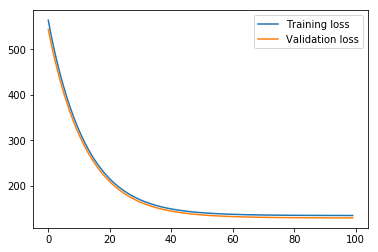

In [0]:
get_learning_curves(train_loss, test_loss)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


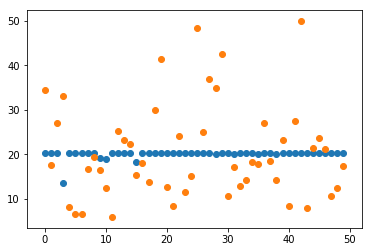

In [0]:
x=np.linspace(0,2999,3000)
plt.scatter(x[:50],model(TX).cpu().detach().numpy()[:50])
plt.scatter(x[:50],TY.cpu().numpy()[:50])

In [0]:
# Y/=10000
# TY/=10000

In [0]:
model(X)

tensor([[20.5431],
        [20.5431],
        [20.5431],
        ...,
        [20.5431],
        [20.5431],
        [20.5431]], device='cuda:0', grad_fn=<AddmmBackward>)

In [0]:
nn.Parameter(torch.randn(8, 8))

Parameter containing:
tensor([[ 1.6065,  2.0141, -0.1241, -0.3320, -0.6836, -0.8420, -0.3099,  0.7667],
        [ 1.4330, -0.4664, -1.3006, -0.3239,  0.7577,  0.1206,  0.7070,  1.2071],
        [ 1.7440,  0.3670,  0.1727,  1.3456, -0.0388, -2.3345, -0.0984,  0.5866],
        [-0.5168,  0.7591,  0.0996, -0.3076,  0.2502, -0.1844,  1.7873,  0.7195],
        [-0.6962, -0.8199,  0.9180, -1.6674,  0.7919, -2.2615,  0.3318, -0.6219],
        [-0.4175,  0.9886,  0.6647, -0.6188, -0.9749,  2.5481, -0.5580, -2.1878],
        [ 0.7063, -0.6957,  0.3103,  0.2071, -0.5166, -0.8926,  2.5432, -0.6681],
        [-0.0303, -0.2575,  0.1287,  2.2734,  2.0804, -0.4510, -0.2762,  0.0302]],
       requires_grad=True)

### another test

In [0]:
class housing_predict(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights_1 = nn.Parameter(torch.randn(8, 16))
    self.bias_1 = nn.Parameter(torch.zeros(16))
    
    self.weights_2 = nn.Parameter(torch.randn(16, 8))
    self.bias_2 = nn.Parameter(torch.zeros(8))
    
    self.weights_3 = nn.Parameter(torch.randn(8, 1))
    self.bias_3 = nn.Parameter(torch.zeros(1))

  def forward(self, xb):
    h =  xb.matmul(self.weights_1) + self.bias_1
    h = F.relu(h)
    h =  h.matmul(self.weights_2) + self.bias_2
    h = F.relu(h)
    h =  h.matmul(self.weights_3) + self.bias_3
    out = h
    return out

In [0]:
model=housing_predict()
model.cuda()
# train_loss, test_loss = train_model(model,X,Y,TX,TY,epochs=50, batch_size=128,lr=0.001)

housing_predict()

In [0]:
model(X)

tensor([[-1134.5991],
        [-3357.7480],
        [  -77.3879],
        ...,
        [ 1810.8872],
        [ 1927.6865],
        [ 1061.8735]], device='cuda:0', grad_fn=<AddBackward0>)

In [0]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=100, lr=0.0001, weight_decay=0):
  # data
  train_dataset = TensorDataset(x_train, y_train)
  train_data_loader = DataLoader(train_dataset, batch_size=batch_size)

  # loss function
  loss_func = F.mse_loss

  # optimizer
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

  # training loop
  y_pred = model(x_test)
  print('Test error of model before training: ', loss_func(y_pred, y_test))

  train_loss = []
  test_loss = []
  for epoch in range(epochs):
    epoch_loss = 0
    
    for xb, yb in train_data_loader:
      
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      
      epoch_loss += loss
    
    y_pred = model(x_test)
    test_loss.append(loss_func(y_pred, y_test))
    train_loss.append(epoch_loss/len(train_data_loader))
    
    print('Loss at epoch %d : %f' % (epoch, epoch_loss/len(train_data_loader)))

  # model evaluation
  y_pred = model(x_test)
  print('Test error of model after training: ', loss_func(y_pred, y_test))
  return train_loss, test_loss

In [0]:
train_loss, test_loss = train_model(model,X,Y,TX,TY,epochs=50, batch_size=128,lr=0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(3.3812e+09, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : inf
Loss at epoch 1 : inf
Loss at epoch 2 : inf
Loss at epoch 3 : inf
Loss at epoch 4 : inf
Loss at epoch 5 : inf
Loss at epoch 6 : inf
Loss at epoch 7 : inf
Loss at epoch 8 : inf
Loss at epoch 9 : inf
Loss at epoch 10 : 12587590958960621576722402456371200.000000
Loss at epoch 11 : 7390377002589752417740006805733376.000000
Loss at epoch 12 : 4339008619801171248612821809758208.000000
Loss at epoch 13 : 2547502337483655510982812179103744.000000
Loss at epoch 14 : 1495680083919625912168328061779968.000000
Loss at epoch 15 : 878138182854756371538396451962880.000000
Loss at epoch 16 : 515569414379450960258868365492224.000000
Loss at epoch 17 : 302699531638198964258923436048384.000000
Loss at epoch 18 : 177719697208904225470058424434688.000000
Loss at epoch 19 : 104342155377181278060088506974208.000000
Loss at epoch 20 : 61260928062130415833942906109952.000000
Loss at epoch 21 : 35967288822418741472037011718144.000000
Loss at epoch 22 : 21116989125370990445447310475264.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


### RNN

In [0]:
class lstm_reg(nn.Module):
     def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
          super(lstm_reg, self).__init__()
          
          self.rnn = nn.LSTM(input_size, hidden_size, num_layers)
          self.reg = nn.Linear(hidden_size, output_size)
          
     def forward(self, x):
          x, _ = self.rnn(x) 
          s, b, h = x.shape  #(seq, batch, hidden)
          x = x.view(s*b, h) #转化为线性层的输入方式
          x = self.reg(x)
          x = x.view(s, b, -1)
          return x
#定义好网络结构，输入的维度是 8，因为我们使用两个月的流量作为输入，隐藏层的维度可以任意指定，这里我们选的 4
net = lstm_reg(8, 4)
print(net)

lstm_reg(
  (rnn): LSTM(8, 4, num_layers=2)
  (reg): Linear(in_features=4, out_features=1, bias=True)
)


In [0]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=100, lr=0.0001, weight_decay=0):
  # data
  train_dataset = TensorDataset(x_train, y_train)
  train_data_loader = DataLoader(train_dataset, batch_size=batch_size)

  # loss function
  loss_func = F.mse_loss

  # optimizer
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

  # training loop
  y_pred = model(x_test)
  print('Test error of model before training: ', loss_func(y_pred, y_test))

  train_loss = []
  test_loss = []
  for epoch in range(epochs):
    epoch_loss = 0
    
    for xb, yb in train_data_loader:
      
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      
      epoch_loss += loss
    
    y_pred = model(x_test)
    test_loss.append(loss_func(y_pred, y_test))
    train_loss.append(epoch_loss/len(train_data_loader))
    
    print('Loss at epoch %d : %f' % (epoch, epoch_loss/len(train_data_loader)))

  # model evaluation
  y_pred = model(x_test)
  print('Test error of model after training: ', loss_func(y_pred, y_test))
  return train_loss, test_loss

In [0]:
train_loss, test_loss = train_model(net,X,Y,TX,TY,epochs=50, batch_size=128,lr=0.001)

RuntimeError: ignored

In [0]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=8, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=8, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [0]:
net.cuda()
train_loss, test_loss = train_model(net,X,Y,TX,TY,epochs=50, batch_size=128,lr=0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(51062.4922, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([104])) that is different to the input size (torch.Size([104, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 107343966633984.000000
Loss at epoch 1 : 24857438208.000000
Loss at epoch 2 : 14594193408.000000
Loss at epoch 3 : 8568486400.000000
Loss at epoch 4 : 5030693888.000000
Loss at epoch 5 : 2953598720.000000
Loss at epoch 6 : 1734103168.000000
Loss at epoch 7 : 1018118016.000000
Loss at epoch 8 : 597752320.000000
Loss at epoch 9 : 350949056.000000
Loss at epoch 10 : 206047216.000000
Loss at epoch 11 : 120973392.000000
Loss at epoch 12 : 71025232.000000
Loss at epoch 13 : 41699868.000000
Loss at epoch 14 : 24482526.000000
Loss at epoch 15 : 14373988.000000
Loss at epoch 16 : 8439156.000000
Loss at epoch 17 : 4954737.000000
Loss at epoch 18 : 2908998.750000
Loss at epoch 19 : 1707926.500000
Loss at epoch 20 : 1002770.000000
Loss at epoch 21 : 588769.437500
Loss at epoch 22 : 345710.093750
Loss at epoch 23 : 203010.968750
Loss at epoch 24 : 119233.703125
Loss at epoch 25 : 70049.828125
Loss at epoch 26 : 41175.460938
Loss at epoch 27 : 24224.593750
Loss at epoch 28 : 14273.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000])) that is different to the input size (torch.Size([3000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [0]:
net(X)

tensor([[20.4067],
        [20.4067],
        [20.4067],
        ...,
        [20.4067],
        [20.4067],
        [20.4067]], device='cuda:0', grad_fn=<AddmmBackward>)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


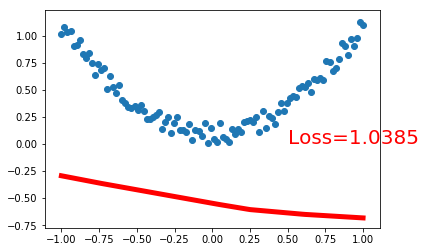

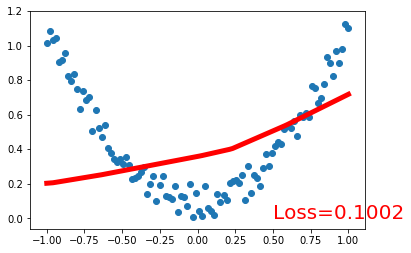

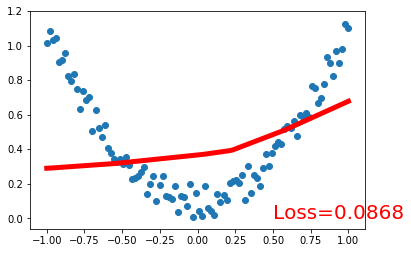

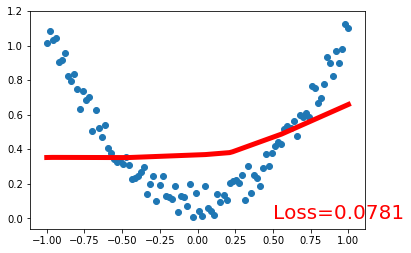

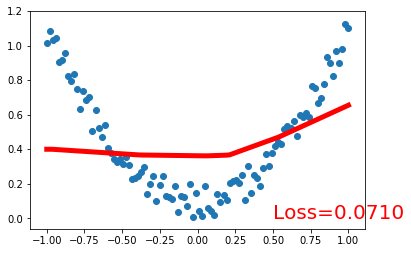

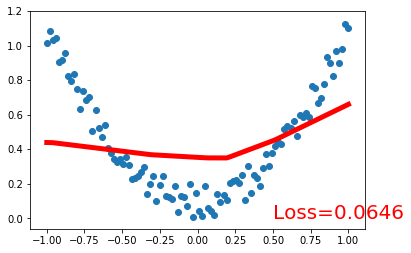

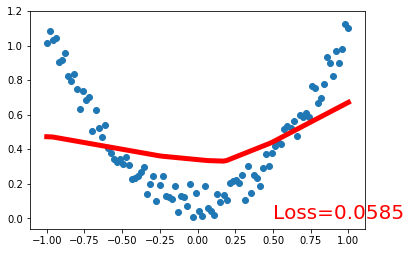

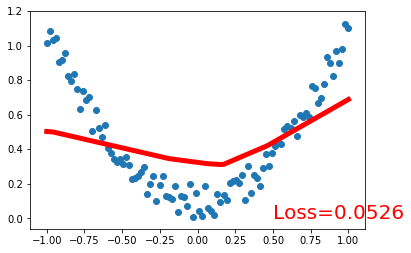

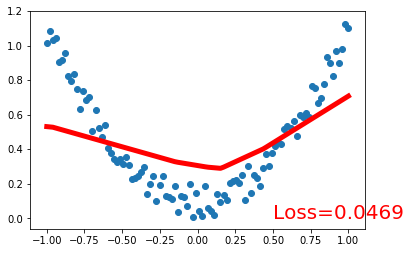

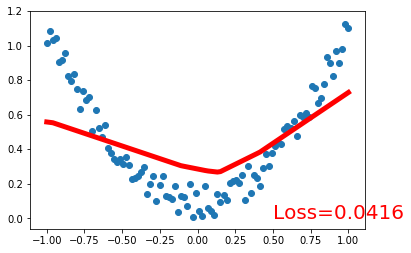

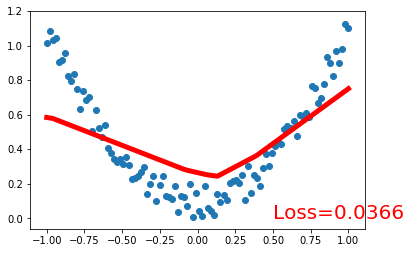

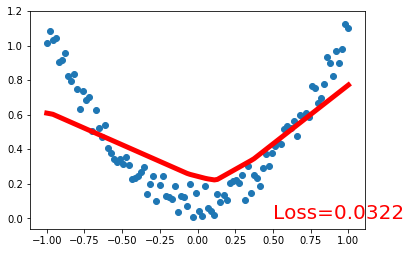

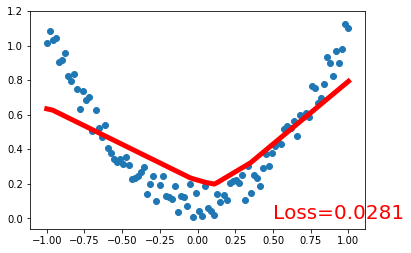

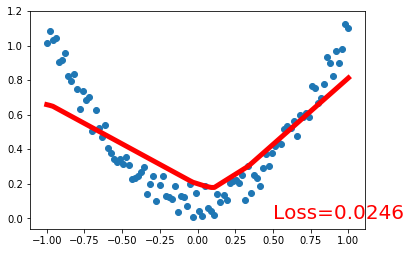

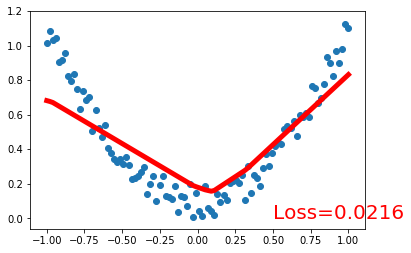

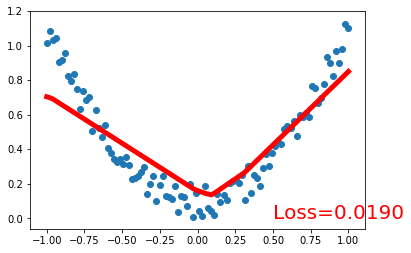

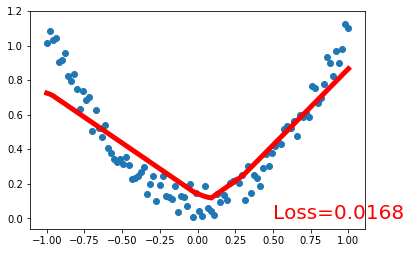

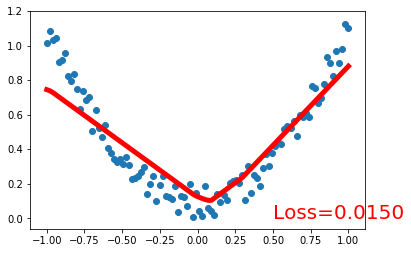

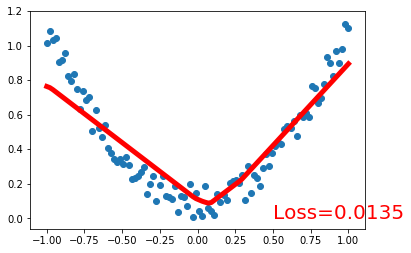

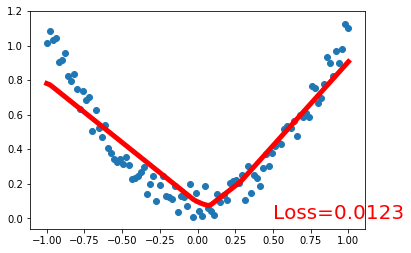

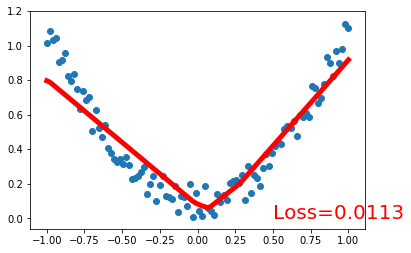

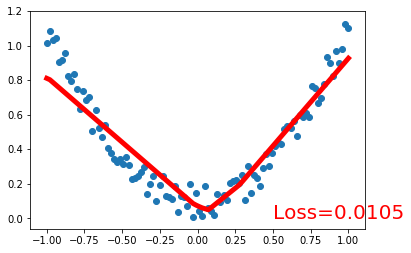

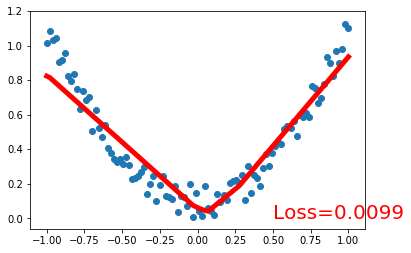

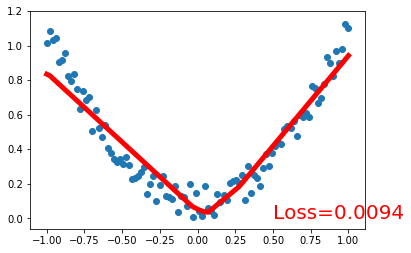

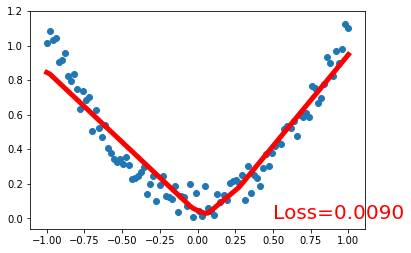

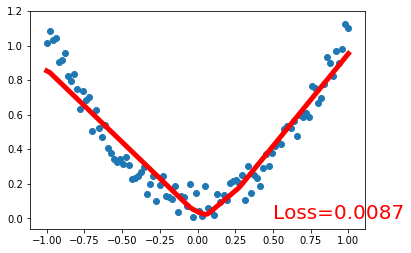

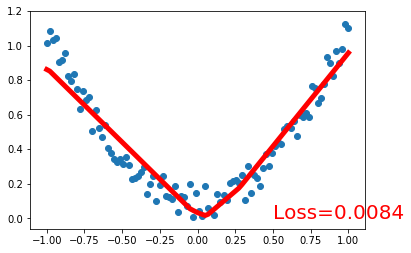

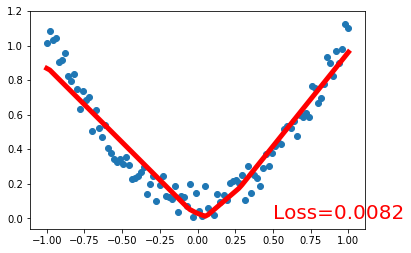

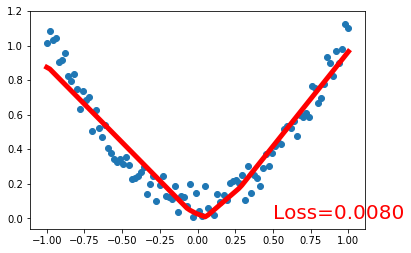

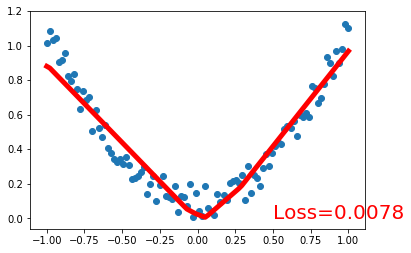

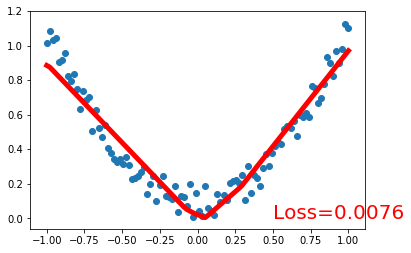

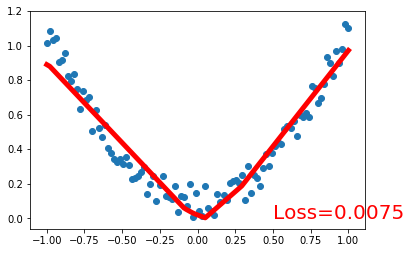

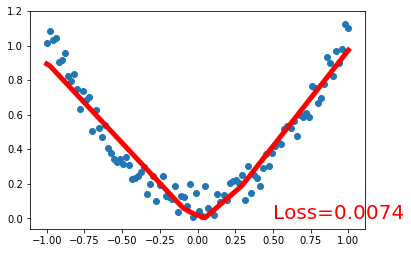

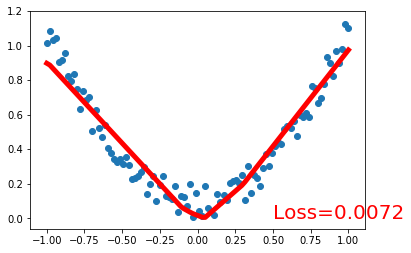

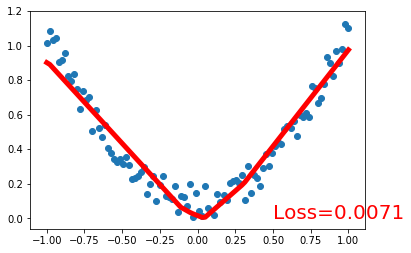

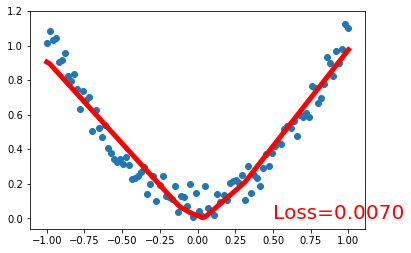

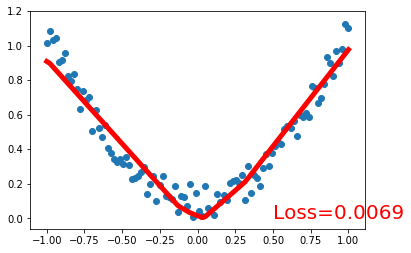

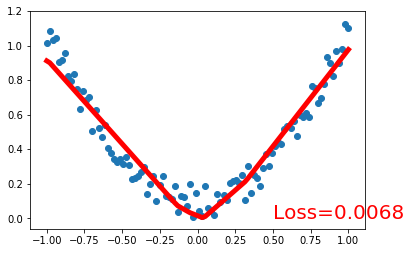

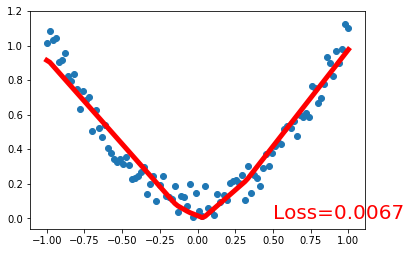

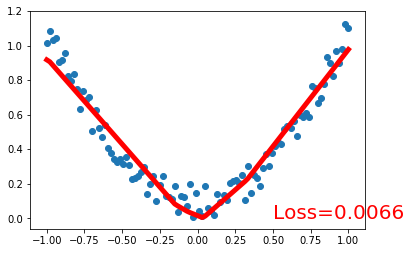

In [0]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

## test of my classmates

In [0]:
data = np.genfromtxt("/content/sample_data/california_housing_train.csv",delimiter=',')

x_train = data[1:,:-1]
y_train = data[1:,-1]
print(x_train.shape,y_train.shape)

datatest = np.genfromtxt("/content/sample_data/california_housing_test.csv",delimiter=',')

x_test = datatest[1:,:-1]
y_test = datatest[1:,-1]
print(x_test.shape,y_test.shape)

(17000, 8) (17000,)
(3000, 8) (3000,)


In [0]:
data[0:1]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [0]:
x_train, y_train, x_test, y_test = map(
    torch.FloatTensor, (x_train[:, np.newaxis], y_train[:, np.newaxis], x_test[:, np.newaxis], y_test[:, np.newaxis])
)
n=x_train.shape[0]

In [0]:
x_train=x_train.cuda()
y_train=y_train.cuda()
x_test=x_test.cuda()
y_test=y_test.cuda()

In [0]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=100, lr=0.0001, weight_decay=0):
  # data
  train_dataset = TensorDataset(x_train, y_train)
  train_data_loader = DataLoader(train_dataset, batch_size=batch_size)

  # loss function
  loss_func = F.mse_loss

  # optimizer
  optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

  # training loop
  y_pred = model(x_test)
  print('Test error of model before training: ', loss_func(y_pred, y_test))

  train_loss = []
  test_loss = []
  for epoch in range(epochs):
    epoch_loss = 0
    
    for xb, yb in train_data_loader:
      
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      
      epoch_loss += loss
    
    y_pred = model(x_test)
    test_loss.append(loss_func(y_pred, y_test))
    train_loss.append(epoch_loss/len(train_data_loader))
    
    print('Loss at epoch %d : %f' % (epoch, epoch_loss/len(train_data_loader)))

  # model evaluation
  y_pred = model(x_test)
  print('Test error of model after training: ', loss_func(y_pred, y_test))
  return train_loss, test_loss

In [0]:
class housing_predict(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights_1 = nn.Parameter(torch.randn(8, 8))
    self.bias_1 = nn.Parameter(torch.zeros(8))
    
    self.weights_2 = nn.Parameter(torch.randn(8, 4))
    self.bias_2 = nn.Parameter(torch.zeros(4))
    
    self.weights_3 = nn.Parameter(torch.randn(4, 2))
    self.bias_3 = nn.Parameter(torch.zeros(2))

    self.weights_4 = nn.Parameter(torch.randn(2, 1))
    self.bias_4 = nn.Parameter(torch.zeros(1))

  def forward(self, xb):
    h =  xb.matmul(self.weights_1) + self.bias_1
    h = F.tanh(h)
    h =  h.matmul(self.weights_2) + self.bias_2
    h = F.tanh(h)
    h =  h.matmul(self.weights_3) + self.bias_3
    h = F.tanh(h)
    h =  h.matmul(self.weights_4) + self.bias_4
    out = h
    return out

In [0]:
model=housing_predict()
model.cuda()
train_loss, test_loss = train_model(model, x_train, y_train, x_test, y_test, lr=0.000005)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(5.5164e+10, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 56208678912.000000
Loss at epoch 1 : 55774732288.000000
Loss at epoch 2 : 55345192960.000000
Loss at epoch 3 : 54920019968.000000
Loss at epoch 4 : 54499147776.000000
Loss at epoch 5 : 54082551808.000000
Loss at epoch 6 : 53670174720.000000
Loss at epoch 7 : 53262004224.000000
Loss at epoch 8 : 52857958400.000000
Loss at epoch 9 : 52458000384.000000
Loss at epoch 10 : 52062126080.000000
Loss at epoch 11 : 51670269952.000000
Loss at epoch 12 : 51282370560.000000
Loss at epoch 13 : 50898440192.000000
Loss at epoch 14 : 50518372352.000000
Loss at epoch 15 : 50142191616.000000
Loss at epoch 16 : 49769807872.000000
Loss at epoch 17 : 49401200640.000000
Loss at epoch 18 : 49036341248.000000
Loss at epoch 19 : 48675196928.000000
Loss at epoch 20 : 48317698048.000000
Loss at epoch 21 : 47963832320.000000
Loss at epoch 22 : 47613562880.000000
Loss at epoch 23 : 47266852864.000000
Loss at epoch 24 : 46923665408.000000
Loss at epoch 25 : 46583947264.000000
Loss at epoch 26 : 462

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [0]:
train_loss, test_loss = train_model(model, x_train, y_train, x_test, y_test, lr=0.0005,epochs=50)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(2.0929e+10, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 14053584896.000000
Loss at epoch 1 : 13291437056.000000
Loss at epoch 2 : 13295890432.000000
Loss at epoch 3 : 13295916032.000000
Loss at epoch 4 : 13295916032.000000
Loss at epoch 5 : 13295916032.000000
Loss at epoch 6 : 13295916032.000000
Loss at epoch 7 : 13295916032.000000
Loss at epoch 8 : 13295916032.000000
Loss at epoch 9 : 13295916032.000000
Loss at epoch 10 : 13295916032.000000
Loss at epoch 11 : 13295916032.000000
Loss at epoch 12 : 13295916032.000000
Loss at epoch 13 : 13295916032.000000
Loss at epoch 14 : 13295916032.000000
Loss at epoch 15 : 13295916032.000000
Loss at epoch 16 : 13295916032.000000
Loss at epoch 17 : 13295916032.000000
Loss at epoch 18 : 13295916032.000000
Loss at epoch 19 : 13295916032.000000
Loss at epoch 20 : 13295916032.000000
Loss at epoch 21 : 13295916032.000000
Loss at epoch 22 : 13295916032.000000
Loss at epoch 23 : 13295916032.000000
Loss at epoch 24 : 13295916032.000000
Loss at epoch 25 : 13295916032.000000
Loss at epoch 26 : 132

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [0]:
train_loss, test_loss = train_model(model, x_train, y_train, x_test, y_test, lr=0.0005,epochs=30)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Test error of model before training:  tensor(1.3067e+10, device='cuda:0', grad_fn=<MseLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Loss at epoch 0 : 13610621952.000000
Loss at epoch 1 : 13523069952.000000
Loss at epoch 2 : 13488323584.000000
Loss at epoch 3 : 13473884160.000000
Loss at epoch 4 : 13467525120.000000
Loss at epoch 5 : 13464541184.000000
Loss at epoch 6 : 13463050240.000000
Loss at epoch 7 : 13462257664.000000
Loss at epoch 8 : 13461824512.000000
Loss at epoch 9 : 13461578752.000000
Loss at epoch 10 : 13461435392.000000
Loss at epoch 11 : 13461353472.000000
Loss at epoch 12 : 13461303296.000000
Loss at epoch 13 : 13461273600.000000
Loss at epoch 14 : 13461255168.000000
Loss at epoch 15 : 13461245952.000000
Loss at epoch 16 : 13461239808.000000
Loss at epoch 17 : 13461240832.000000
Loss at epoch 18 : 13461231616.000000
Loss at epoch 19 : 13461228544.000000
Loss at epoch 20 : 13461233664.000000
Loss at epoch 21 : 13461233664.000000
Loss at epoch 22 : 13461231616.000000
Loss at epoch 23 : 13461230592.000000
Loss at epoch 24 : 13461230592.000000
Loss at epoch 25 : 13461230592.000000
Loss at epoch 26 : 134

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Using a target size (torch.Size([3000, 1])) that is different to the input size (torch.Size([3000, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


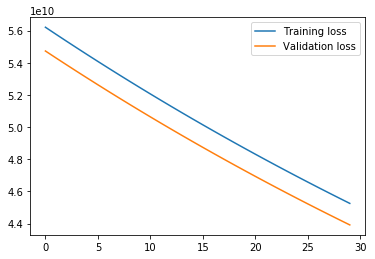

In [0]:
get_learning_curves(train_loss, test_loss)

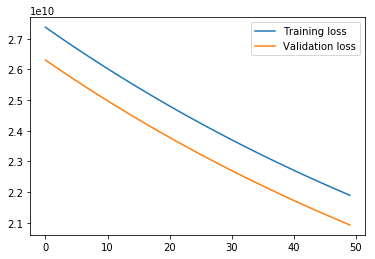

In [0]:
get_learning_curves(train_loss, test_loss)

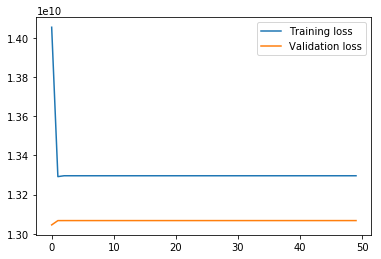

In [0]:
get_learning_curves(train_loss, test_loss)

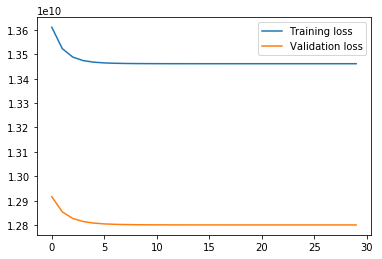

In [0]:
get_learning_curves(train_loss, test_loss)

In [0]:
model(x_train)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([[[208863.5625]],

        [[208863.5625]],

        [[208863.5625]],

        ...,

        [[208863.5625]],

        [[208863.5625]],

        [[208863.5625]]], device='cuda:0', grad_fn=<AddBackward0>)

In [0]:
model(x_test)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([[[208863.5625]],

        [[208863.5625]],

        [[208863.5625]],

        ...,

        [[208863.5625]],

        [[208863.5625]],

        [[208863.5625]]], device='cuda:0', grad_fn=<AddBackward0>)